Name - H.M.P.Siriwardana

Index- 190595J

Assignment_01

1)

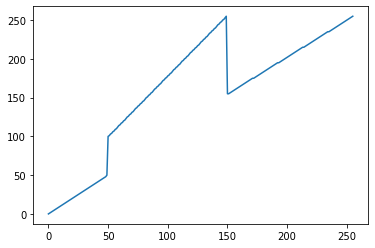

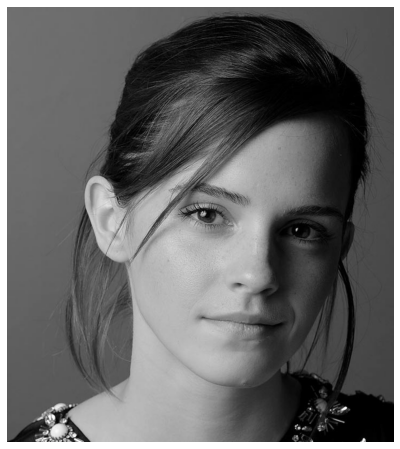

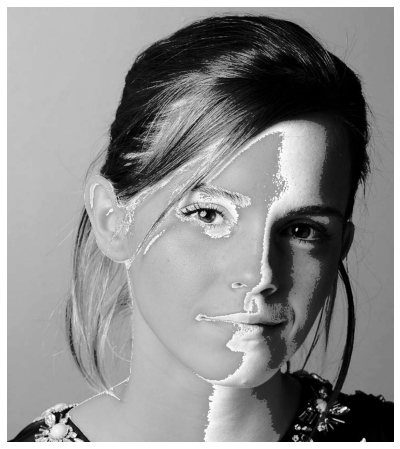

In [20]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

 
img =cv.imread(r'./Images/emma_gray.jpg',cv.IMREAD_GRAYSCALE)
assert img is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(155,255,106)


t = np.concatenate((t1,t2,t3),axis = 0).astype(np.uint8)

g = cv.LUT(img,t)

fig, ax = plt.subplots()
ax.plot(t)


cv.namedWindow('Image',cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img)
cv.waitKey(0)
cv.imshow('Image',g)
cv.waitKey(0)
cv.destroyAllWindows()

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
implot = plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
implot = plt.imshow(cv.cvtColor(g, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()